In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Multivariate Normal in Python

## TOC

- [Covariance and Correlation matrices in Pandas](#Covariance-and-Correlation-matrices-in-Pandas )
- [Generating random variables](#Generating-random-variables)
    - [Univariate Normal](#Univariate-Normal)
    - [Multivariate Normal](#Multivariate-Normal)
- [Task 1](#Task-1)
- [Task 2](#Task-2)
- [Task 3](#Task-3)
- [Task 4](#Task-4)
- [Task 5](#Task-5)

## Covariance and Correlation matrices in Pandas 

In [2]:
df_infl = pd.read_csv('../01-Basics/data/HICP_unadj_ANR_clean.csv',
                      index_col=0,
                      parse_dates=True,
                      infer_datetime_format=True
                     )

In [3]:
df_infl.head()

,U2,DE,FR,ES,PT
date,,,,,
1997-01-01,2.0,1.9,1.8,2.8,2.8
1997-02-01,1.8,1.6,1.7,2.5,2.4
1997-03-01,1.6,1.3,1.1,2.2,2.3
1997-04-01,1.3,1.2,1.0,1.6,1.6
1997-05-01,1.4,1.5,0.9,1.3,1.9


Compute the sample covariance matrix

In [4]:
df_infl.cov()

,U2,DE,FR,ES,PT
U2,0.961381,0.823101,0.817719,1.441777,1.039977
DE,0.823101,0.895325,0.679858,1.094757,0.647251
FR,0.817719,0.679858,0.793885,1.186220,0.831415
ES,1.441777,1.094757,1.186220,2.515297,1.789404
PT,1.039977,0.647251,0.831415,1.789404,2.060114


Compute the sample correlation matrix

In [5]:
correlations = df_infl.corr() # method='spearman' for rank correlation
correlations

,U2,DE,FR,ES,PT
U2,1.000000,0.887187,0.936003,0.927163,0.738976
DE,0.887187,1.000000,0.806397,0.729512,0.476581
FR,0.936003,0.806397,1.000000,0.839444,0.650120
ES,0.927163,0.729512,0.839444,1.000000,0.786082
PT,0.738976,0.476581,0.650120,0.786082,1.000000


In [6]:
names = correlations.columns.tolist()

''

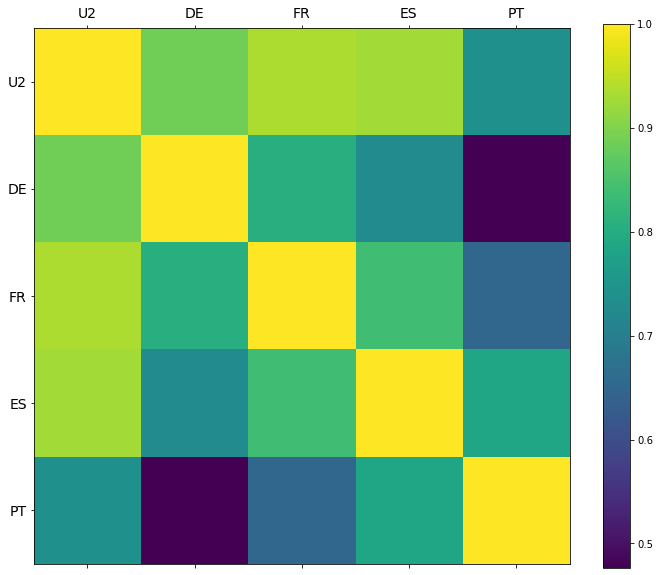

In [7]:
fig, ax = plt.subplots(1, 1,  figsize=(12,10))
cax = ax.matshow(correlations)
fig.colorbar(cax)

ticks = range(len(names))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names, fontsize=14)
ax.set_yticklabels(names, fontsize=14)
;

In [9]:
arr = df_infl.values
arr.shape

(301, 5)

In [14]:
np.corrcoef(arr, rowvar=False)

array([[1.        , 0.88718682, 0.93600324, 0.92716253, 0.73897597],
       [0.88718682, 1.        , 0.80639725, 0.72951243, 0.47658129],
       [0.93600324, 0.80639725, 1.        , 0.83944408, 0.65011956],
       [0.92716253, 0.72951243, 0.83944408, 1.        , 0.78608236],
       [0.73897597, 0.47658129, 0.65011956, 0.78608236, 1.        ]])

In [15]:
np.cov(arr, rowvar=False)

array([[0.96138051, 0.823101  , 0.8177186 , 1.4417773 , 1.03997663],
       [0.823101  , 0.89532514, 0.67985814, 1.09475703, 0.64725138],
       [0.8177186 , 0.67985814, 0.79388527, 1.18622016, 0.83141473],
       [1.4417773 , 1.09475703, 1.18622016, 2.51529723, 1.78940365],
       [1.03997663, 0.64725138, 0.83141473, 1.78940365, 2.06011384]])

## Generating random variables

### Univariate Normal

In [17]:
from numpy.random import default_rng
gen = default_rng(100) # random initialization

In [18]:
type(gen)

numpy.random._generator.Generator

In [ ]:
#state = gen.bit_generator.state
#state
#gen.bit_generator.state = state

In [19]:
x = gen.standard_normal((100_000, 5))

In [21]:
x.shape

(100000, 5)

In [23]:
x[:,0].mean(), x[:,0].std()

(0.0005439119457772664, 0.9983844601440314)

In [24]:
x.mean(axis=0)

array([ 0.00054391,  0.0026703 , -0.00157559,  0.00022928, -0.00305394])

In [25]:
x.std(axis=0)

array([0.99838446, 0.99852719, 0.99701323, 1.001078  , 1.00175055])

In [26]:
x = gen.normal(1.5, 2, (100_000, 5))

In [27]:
x.mean(axis=0)

array([1.4973744 , 1.4991688 , 1.50189636, 1.49773389, 1.49074797])

In [28]:
x.std(axis=0)

array([2.01275443, 2.00435225, 1.99394643, 1.99611457, 1.99867622])

### Multivariate Normal

In [29]:
mu = np.zeros((5))

In [30]:
mu

array([0., 0., 0., 0., 0.])

In [32]:
Sigma = np.cov(arr, rowvar=False)
Sigma.shape

(5, 5)

In [39]:
Sigma

array([[0.96138051, 0.823101  , 0.8177186 , 1.4417773 , 1.03997663],
       [0.823101  , 0.89532514, 0.67985814, 1.09475703, 0.64725138],
       [0.8177186 , 0.67985814, 0.79388527, 1.18622016, 0.83141473],
       [1.4417773 , 1.09475703, 1.18622016, 2.51529723, 1.78940365],
       [1.03997663, 0.64725138, 0.83141473, 1.78940365, 2.06011384]])

In [46]:
z = gen.multivariate_normal(mean=mu,  cov=Sigma, size=1_000_000)

In [47]:
z.shape

(1000000, 5)

In [48]:
z.mean(axis=0)

array([0.00145788, 0.00099858, 0.0013953 , 0.00201981, 0.00250335])

In [49]:
z.var(axis=0)

array([0.9626769 , 0.89607504, 0.79496105, 2.51723147, 2.05900802])

In [51]:
Sigma.diagonal()

array([0.96138051, 0.89532514, 0.79388527, 2.51529723, 2.06011384])

In [52]:
np.diag(Sigma.diagonal())

array([[0.96138051, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.89532514, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.79388527, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 2.51529723, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 2.06011384]])

### Legacy approach to setting state

In [67]:
np.random.seed(42)

In [68]:
st = np.random.get_state()

In [75]:
np.random.set_state(st)

In [76]:
z2 = np.random.multivariate_normal(mean=mu, cov=Sigma, size=10000)

In [77]:
z2[0]

array([-0.47317327, -0.74897768,  0.04768613, -0.59892074, -0.87556863])

In [ ]:
z2[0]

In [ ]:
z2.mean(axis=0)

In [ ]:
z2.var(axis=0)

## Affine transformation

$$ \text{From  } A \text{ to } \Sigma  = \sigma^2 A A' $$

In [78]:
# generate a random A
A = gen.normal(1, 1, (4,4))
A

array([[-1.16074887,  0.97572461,  1.40518003,  0.75385882],
       [ 2.26464852,  3.44313816,  0.00482065,  1.38997288],
       [-0.36680347,  0.37798247,  1.08261732,  0.50537373],
       [ 0.22048157,  0.97625117,  1.08834508,  0.69162503]])

In [87]:
sigma2 = 1

In [88]:
Sigma = sigma2 * A@A.T

In [89]:
Sigma - sigma2*np.dot(A,A.T)

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [90]:
Sigma

array([[19.36884196,  7.14193443, 10.78730481, 10.98934784],
       [ 7.14193443, 75.66352472,  4.7137585 , 19.3090699 ],
       [10.78730481,  4.7137585 ,  6.81951365,  7.26369114],
       [10.98934784, 19.3090699 ,  7.26369114, 10.65807466]])

In [91]:
A = np.linalg.cholesky(Sigma)
A

array([[4.40100465, 0.        , 0.        , 0.        ],
       [1.62279638, 8.5457625 , 0.        , 0.        ],
       [2.45110052, 0.08613877, 0.89677198, 0.        ],
       [2.49700891, 1.78532142, 1.10338629, 0.13486019]])

In [92]:
S = sigma2*A@A.T

In [93]:
np.testing.assert_almost_equal(S, Sigma)

In [95]:
np.abs(S - Sigma).max()

0.0

## Task 1
Set `gen = default_rng(100)`, and generate 10000 samples from bivariate normal with mean (10, 10) and variances 3 and 1 and covariance 1. Compute the sample covariance matrix __without__ using the `np.cov()` method. Compare the result with the obtained using `np.cov`.


[go back](#TOC)

###

In [ ]:
gen = default_rng(100)
N = 10_000

mean = np.array([10,10])
cov = np.array([[3,1],[1,5]])

x = gen.multivariate_normal(mean=mean, cov=cov, size=N)

u = x - x.mean(0)
cov = u.T@u/(N-1)

print(cov)
print('*'*30)
print(np.cov(x, rowvar=False))
print('*'*30)
np.testing.assert_almost_equal(cov, np.cov(x, rowvar=False))

## Task 2
Let $z_1$ and $z_2$ be bivariate normal with means 0, variances 1, and covariance .9. Compute the conditional mean and variance of $z_1$, given that $z_2=1$.

$$
p(z_1 | z_2) = \mathcal{N}\left(\mu_1 + \frac{\rho \sigma_{1}}{\sigma_{2}} (z_2 - \mu_2), (1 - \rho^2)\sigma_1^2\right)
$$

[go back](#TOC)

###

In [100]:
rho=.9
sigma1 = 1
sigma2 = 1
mu1=0
mu2=0

z2 = 1

(
mu1 + (z2 - mu2)*(rho*sigma1)/(sigma2), 
(1 - rho**2)*sigma1**2
)

(0.9, 0.18999999999999995)

## General case

$$
\begin{align}
\operatorname{E}(\mathbf{z}_1 | \mathbf{z}_2) &= \boldsymbol \mu_1 + \mathbf{\Sigma}_{1 2} \mathbf{\Sigma}^{-1}_{2 2} (\mathbf{z}_2 - \boldsymbol \mu_2) \\
\operatorname{cov}(\mathbf{z}_1 | \mathbf{z}_2) &= \mathbf{\Sigma}_{1 1} - \mathbf{\Sigma}_{1 2}\mathbf{\Sigma}_{2 2}^{-1}\mathbf{\Sigma}_{2 1}
\end{align}
$$

## Task 3
Compute the conditional mean and variance of $z_1$, given that $z_2=1$ Using


In [101]:
Sigma12 = np.array([[0.1]])
Sigma22 = np.array([[1.0]])
Sigma21 = np.array([[0.1]])
Sigma11 = np.array([[1.0]])

mu1 = np.array([0])
mu2 = np.array([0])

###

In [99]:
z2 = np.array([1])

cond_mu = mu1 + (Sigma12 / np.linalg.inv(Sigma22)) * (z2 - mu2)
cond_mu

array([[0.1]])

In [102]:
cond_cov = Sigma11 - Sigma12 @ np.linalg.inv(Sigma22) @ Sigma21
cond_cov

array([[0.99]])

In [ ]:
solve(Sigma22, z2 - mu2)

cond_mu = mu1 + Sigma12 @ np.linalg.solve(Sigma22, z2 - mu2)

cond_cov = Sigma11 - Sigma12 @ np.linalg.solve(Sigma22, Sigma21)

cond_mu, cond_cov

## Task 4
Compute the conditional mean and variance of $z_1$, given that $z_2=1$ Using


In [ ]:
Sigma12 = np.array([[0.9]])
Sigma22 = np.array([[1.0]])
Sigma21 = np.array([[0.9]])

mu1 = np.array([0])
mu1 = np.array([0])

###

In [ ]:
z2 = np.array([1])
cond_mu = mu1 + Sigma12 @ np.linalg.solve(Sigma22, z2 - mu2)

cond_cov = Sigma11 - Sigma12 @ np.linalg.solve(Sigma22, Sigma21)

cond_mu, cond_cov

## Task 5

Use `A = gen.normal(1, 1, (4,4))` to compute `Sigma = A@A.T` Let $z$ be 4D Normal with covariance `Sigma` and partition it into $z_1$ and $z_2$ both of which are 2D.
Compute the conditional variance of $z_1$ given $z_2$


###

In [ ]:
A = gen.normal(1, 1, (4,4))
Sigma = A@A.T

indices_1 = [0, 1]
indices_2 = [2, 3]

z2indices = np.zeros(4, bool)
z1indices = z2indices.copy()

z2indices[indices_2] = 1
z1indices[indices_1] = 1

Sigma11 = Sigma[z1indices, :][:, z1indices]
Sigma12 = Sigma[z1indices, :][:, z2indices]
Sigma21 = Sigma[z2indices, :][:, z1indices]
Sigma22 = Sigma[z2indices, :][:, z2indices]

cond_cov = Sigma11 - Sigma12 @ np.linalg.solve(Sigma22, Sigma21)
cond_cov

###

In [ ]:
# Example 1

Sigma = np.cov(arr, rowvar=False)
mu = np.array([1, 3, -4, 2, 3])
indices_2 = [2, 3, 4]
indices_1 = [0, 1]

z2indices = np.zeros(5, bool)
z1indices = z2indices.copy()

z2indices[indices_2] = 1
z1indices[indices_1] = 1

Sigma22 = Sigma[z2indices, :][:, z2indices]
z2 = gen.multivariate_normal(mean=mu2, cov=Sigma22)


In [ ]:
## Example 2
mu = np.array([0, 0])
Sigma = np.array([[1, 0.9], [0.9, 1]])
indices_2 = [1,]
indices_1 = [0,]

z2indices = np.zeros(2, bool)
z1indices = z2indices.copy()

z2indices[indices_2] = 1
z1indices[indices_1] = 1

z2 = np.array([1])#gen.multivariate_normal(mean=mu2, cov=Sigma22)

In [ ]:
## Example 3
mu = np.array([0, 0])
Sigma = np.array([[1, 0.1], [0.1, 1]])
indices_2 = [1,]
indices_1 = [0,]

z2 = np.array([1])#gen.multivariate_normal(mean=mu2, cov=Sigma22)
z2indices = np.zeros(2, bool)
z1indices = z2indices.copy()

z2indices[indices_2] = 1
z1indices[indices_1] = 1

In [ ]:




mu1 = mu[z1indices]
mu2 = mu[z2indices]

Sigma11 = Sigma[z1indices, :][:, z1indices]
Sigma12 = Sigma[z1indices, :][:, z2indices]
Sigma21 = Sigma[z2indices, :][:, z1indices]
Sigma22 = Sigma[z2indices, :][:, z2indices]

cond_mu = mu1 + Sigma12 @ np.linalg.solve(Sigma22, z2 - mu2)

cond_cov = Sigma11 - Sigma12 @ np.linalg.solve(Sigma22, Sigma21)

In [ ]:
Sigma12, Sigma22, Sigma21, mu1